# 학습하기

In [1]:
#파일명 바꾸기

##숫자로 바꾸기

import os, glob

def changeName(path,name):
    i = 1
    for filename in os.listdir(path):
        splits = filename.split('.')
        new = './cnn_color/'+name+'/'+name+str(i)+'.'+splits[-1]
        os.rename(path+filename, new)
        i += 1

In [12]:

changeName('./cnn_color/pastel1/','pastel')


In [6]:
changeName('./cnn_color/achromatic1/','achromatic')



In [3]:
changeName("./cnn_color/vivid1/",'vivid')
#changeName("./cnn_color/vivid",'vivid')

In [4]:
import os,shutil

In [7]:
##훈련 검증 테스트 셋나누기################################################
fnames=['achromatic{}.jpg'.format(i) for i in range(1,801)]
for fname in fnames:
    src=os.path.join("./cnn_color/achromatic/",fname)
    dst=os.path.join("./cnn_color/train/achromatic/",fname)
    shutil.copyfile(src,dst)

In [8]:
fnames=['achromatic{}.jpg'.format(i) for i in range(801,1001)]
for fname in fnames:
    src=os.path.join("./cnn_color/achromatic/",fname)
    dst=os.path.join("./cnn_color/validation/achromatic/",fname)
    shutil.copyfile(src,dst)
    
fnames=['achromatic{}.jpg'.format(i) for i in range(1001,1201)]
for fname in fnames:
    src=os.path.join("./cnn_color/achromatic/",fname)
    dst=os.path.join("./cnn_color/test/achromatic/",fname)
    shutil.copyfile(src,dst)

In [9]:
fnames=['dark{}.jpg'.format(i) for i in range(1,801)]
for fname in fnames:
    src=os.path.join("./cnn_color/dark/",fname)
    dst=os.path.join("./cnn_color/train/dark/",fname)
    shutil.copyfile(src,dst)
    
fnames=['dark{}.jpg'.format(i) for i in range(801,1001)]
for fname in fnames:
    src=os.path.join("./cnn_color/dark/",fname)
    dst=os.path.join("./cnn_color/validation/dark/",fname)
    shutil.copyfile(src,dst)
    
fnames=['dark{}.jpg'.format(i) for i in range(1001,1201)]
for fname in fnames:
    src=os.path.join("./cnn_color/dark/",fname)
    dst=os.path.join("./cnn_color/test/dark/",fname)
    shutil.copyfile(src,dst)

In [10]:
fnames=['vivid{}.jpg'.format(i) for i in range(1,801)]
for fname in fnames:
    src=os.path.join("./cnn_color/vivid/",fname)
    dst=os.path.join("./cnn_color/train/vivid/",fname)
    shutil.copyfile(src,dst)
    
fnames=['vivid{}.jpg'.format(i) for i in range(801,1001)]
for fname in fnames:
    src=os.path.join("./cnn_color/vivid/",fname)
    dst=os.path.join("./cnn_color/validation/vivid/",fname)
    shutil.copyfile(src,dst)
    
fnames=['vivid{}.jpg'.format(i) for i in range(1001,1201)]
for fname in fnames:
    src=os.path.join("./cnn_color/vivid/",fname)
    dst=os.path.join("./cnn_color/test/dark/",fname)
    shutil.copyfile(src,dst)

In [13]:
fnames=['pastel{}.jpg'.format(i) for i in range(1,801)]
for fname in fnames:
    src=os.path.join("./cnn_color/pastel/",fname)
    dst=os.path.join("./cnn_color/train/pastel/",fname)
    shutil.copyfile(src,dst)
    
fnames=['pastel{}.jpg'.format(i) for i in range(801,1001)]
for fname in fnames:
    src=os.path.join("./cnn_color/pastel/",fname)
    dst=os.path.join("./cnn_color/validation/pastel/",fname)
    shutil.copyfile(src,dst)
    
fnames=['pastel{}.jpg'.format(i) for i in range(1001,1201)]
for fname in fnames:
    src=os.path.join("./cnn_color/pastel/",fname)
    dst=os.path.join("./cnn_color/test/pastel/",fname)
    shutil.copyfile(src,dst)

In [1]:
#########################모델 생성##################################################
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [2]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [22]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        "./cnn_color/train",
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        "./cnn_color/validation",
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [5]:

for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20, 4)


## 증식 전 훈련

In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=80,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=20)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 80 steps, validate for 20 steps
Epoch 1/10
80/80 [==============================] - 36s 449ms/step - loss: 0.4774 - acc: 0.7736 - val_loss: 0.4387 - val_acc: 0.7912
Epoch 2/10
80/80 [==============================] - 33s 408ms/step - loss: 0.4301 - acc: 0.8033 - val_loss: 0.4147 - val_acc: 0.8075
Epoch 3/10
80/80 [==============================] - 32s 402ms/step - loss: 0.3957 - acc: 0.8247 - val_loss: 0.4295 - val_acc: 0.8000
Epoch 4/10
80/80 [==============================] - 32s 404ms/step - loss: 0.3852 - acc: 0.8327 - val_loss: 0.3824 - val_acc: 0.8319
Epoch 5/10
80/80 [==============================] - 33s 408ms/step - loss: 0.3600 - acc: 0.8411 - val_loss: 0.3864 - val_acc: 0.8250
Epoch 6/10
80/80 [==============================] - 32s 406ms/step - loss: 0.3519 - acc: 0.8508 - val_loss: 0.3647 - val_acc: 0.8394
Epoch 7/10
80/80 [==============================] - 32s 405ms/step - loss: 0.3305 - acc: 0.8598 - val_loss: 0.

In [10]:
###########################예측 값
import os, re, glob

import cv2

import numpy as np

import shutil

from numpy import argmax

from tensorflow.keras.models import load_model
import matplotlib.image as mpimg

from keras.preprocessing.image import img_to_array

categories = ["achromatic","dark","pastel","vivid"]

 

def Dataization(img_path):
    
    print(img_path)
    image_w = 150

    image_h = 150

    img = mpimg.imread(img_path)

    img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])

    return (img/256)

 

src = []

name = []

test = []

image_dir = "./img/casualShoesSmall/"

#convertSize(image_dir,image_dir+'resize/')

for file in os.listdir(image_dir):

    if (file.find('.jpg') is not -1):       

        src.append(image_dir + file)

        name.append(file)

        test.append(Dataization(image_dir + file))

 

test = np.array(test)

#test = img_to_array(test)

#model = load_model('vgg_color.h5')

predict = model.predict_classes(test)

 

for i in range(len(test)):
    #print(predict[i])
    print(name[i] + " : , Predict : "+ str(categories[predict[i]]))


./img/casualShoesSmall/0.jpg
./img/casualShoesSmall/1.jpg
./img/casualShoesSmall/10.jpg
./img/casualShoesSmall/100.jpg
./img/casualShoesSmall/1000.jpg
./img/casualShoesSmall/1002.jpg
./img/casualShoesSmall/1003.jpg
./img/casualShoesSmall/1004.jpg
./img/casualShoesSmall/1005.jpg
./img/casualShoesSmall/1006.jpg
./img/casualShoesSmall/1007.jpg
./img/casualShoesSmall/1009.jpg
./img/casualShoesSmall/101.jpg
./img/casualShoesSmall/1010.jpg
./img/casualShoesSmall/1011.jpg
./img/casualShoesSmall/1012.jpg
./img/casualShoesSmall/1013.jpg
./img/casualShoesSmall/1014.jpg
./img/casualShoesSmall/1016.jpg
./img/casualShoesSmall/1017.jpg
./img/casualShoesSmall/1018.jpg
./img/casualShoesSmall/1019.jpg
./img/casualShoesSmall/102.jpg
./img/casualShoesSmall/1020.jpg
./img/casualShoesSmall/1021.jpg
./img/casualShoesSmall/1022.jpg
./img/casualShoesSmall/1024.jpg
./img/casualShoesSmall/1025.jpg
./img/casualShoesSmall/1027.jpg
./img/casualShoesSmall/1028.jpg
./img/casualShoesSmall/1029.jpg
./img/casualShoesSm

./img/casualShoesSmall/390.jpg
./img/casualShoesSmall/391.jpg
./img/casualShoesSmall/392.jpg
./img/casualShoesSmall/393.jpg
./img/casualShoesSmall/394.jpg
./img/casualShoesSmall/396.jpg
./img/casualShoesSmall/397.jpg
./img/casualShoesSmall/398.jpg
./img/casualShoesSmall/399.jpg
./img/casualShoesSmall/4.jpg
./img/casualShoesSmall/40.jpg
./img/casualShoesSmall/400.jpg
./img/casualShoesSmall/401.jpg
./img/casualShoesSmall/403.jpg
./img/casualShoesSmall/404.jpg
./img/casualShoesSmall/405.jpg
./img/casualShoesSmall/406.jpg
./img/casualShoesSmall/41.jpg
./img/casualShoesSmall/410.jpg
./img/casualShoesSmall/411.jpg
./img/casualShoesSmall/412.jpg
./img/casualShoesSmall/413.jpg
./img/casualShoesSmall/414.jpg
./img/casualShoesSmall/416.jpg
./img/casualShoesSmall/418.jpg
./img/casualShoesSmall/419.jpg
./img/casualShoesSmall/42.jpg
./img/casualShoesSmall/421.jpg
./img/casualShoesSmall/423.jpg
./img/casualShoesSmall/424.jpg
./img/casualShoesSmall/425.jpg
./img/casualShoesSmall/426.jpg
./img/casualS

./img/casualShoesSmall/73.jpg
./img/casualShoesSmall/730.jpg
./img/casualShoesSmall/735.jpg
./img/casualShoesSmall/738.jpg
./img/casualShoesSmall/739.jpg
./img/casualShoesSmall/74.jpg
./img/casualShoesSmall/740.jpg
./img/casualShoesSmall/742.jpg
./img/casualShoesSmall/745.jpg
./img/casualShoesSmall/749.jpg
./img/casualShoesSmall/75.jpg
./img/casualShoesSmall/753.jpg
./img/casualShoesSmall/755.jpg
./img/casualShoesSmall/757.jpg
./img/casualShoesSmall/758.jpg
./img/casualShoesSmall/759.jpg
./img/casualShoesSmall/760.jpg
./img/casualShoesSmall/764.jpg
./img/casualShoesSmall/765.jpg
./img/casualShoesSmall/766.jpg
./img/casualShoesSmall/767.jpg
./img/casualShoesSmall/768.jpg
./img/casualShoesSmall/77.jpg
./img/casualShoesSmall/770.jpg
./img/casualShoesSmall/771.jpg
./img/casualShoesSmall/772.jpg
./img/casualShoesSmall/773.jpg
./img/casualShoesSmall/775.jpg
./img/casualShoesSmall/776.jpg
./img/casualShoesSmall/777.jpg
./img/casualShoesSmall/779.jpg
./img/casualShoesSmall/78.jpg
./img/casualS

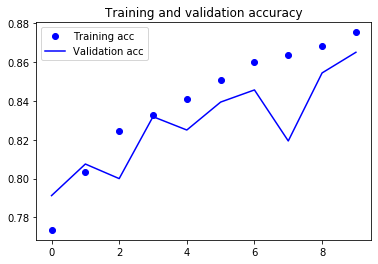

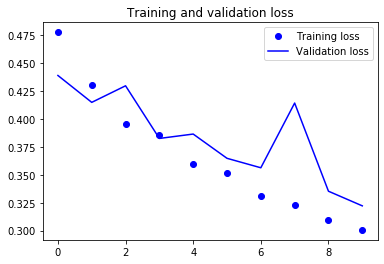

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
model.save('cnn_color_basic.h5')

In [ ]:
model = load_model('cnn_color_basic.h5')

In [21]:
#####################테스트 결과 정확성

test_generator = test_datagen.flow_from_directory(
        './cnn_color/test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

Found 800 images belonging to 4 classes.
  ...
    to  
  ['...']
test acc: 0.80125


## 데이터 증식 후 훈련

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        "./cnn_color/train",
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=40,
        # 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        "./cnn_color/validation",
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=80,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=20)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 80 steps, validate for 20 steps
Epoch 1/10
80/80 [==============================] - 67s 842ms/step - loss: 0.3743 - acc: 0.8387 - val_loss: 0.3410 - val_acc: 0.8503
Epoch 2/10
80/80 [==============================] - 67s 840ms/step - loss: 0.3512 - acc: 0.8532 - val_loss: 0.3389 - val_acc: 0.8581
Epoch 3/10
80/80 [==============================] - 65s 814ms/step - loss: 0.3382 - acc: 0.8608 - val_loss: 0.4066 - val_acc: 0.8175
Epoch 4/10
80/80 [==============================] - 64s 799ms/step - loss: 0.3322 - acc: 0.8626 - val_loss: 0.3208 - val_acc: 0.8678
Epoch 5/10
80/80 [==============================] - 64s 804ms/step - loss: 0.3224 - acc: 0.8677 - val_loss: 0.3343 - val_acc: 0.8594
Epoch 6/10
80/80 [==============================] - 65s 810ms/step - loss: 0.3180 - acc: 0.8694 - val_loss: 0.3131 - val_acc: 0.8684
Epoch 7/10
80/80 [=========

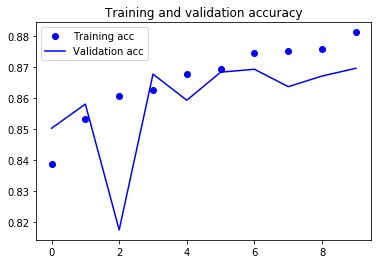

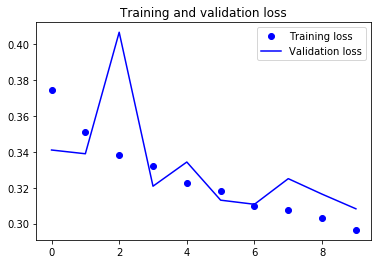

In [14]:
##########훈련 검증 데이터 정확성 확인

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
#####################테스트 결과 정확성

test_generator = test_datagen.flow_from_directory(
        './cnn_color/test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

Found 800 images belonging to 4 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.799375


### 모델 저장

In [15]:
model.save('cnn_color_datagen.h5')

In [21]:
model_json = model.to_json()
with open("colormodel2.json", "w") as json_file : 
    json_file.write(model_json)

In [22]:
model.save_weights("colormodel2.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
model = load_model('cnn_color_datagen.h5')

## VGG16모델2 

In [23]:
########################### VGG16모델2 (훈련된 컨벌루션 신경망)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras import models
from tensorflow.keras.applications import VGG16

transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable=False

model_tr = models.Sequential([
    transfer_model, 
    Flatten(), 
    Dense(64, activation='relu'), 
    Dense(1, 'sigmoid')
])

model_tr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

transfer_history = model_tr.fit_generator(
    train_generator,
    steps_per_epoch=80,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=20)
                            

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 80 steps, validate for 20 steps
Epoch 1/10
80/80 [==============================] - 113s 1s/step - loss: 1.1921e-07 - accuracy: 0.2512 - val_loss: 1.1921e-07 - val_accuracy: 0.2537
Epoch 2/10
80/80 [==============================] - 110s 1s/step - loss: 1.1921e-07 - accuracy: 0.2528 - val_loss: 1.1921e-07 - val_accuracy: 0.2537
Epoch 3/10
80/80 [==============================] - 109s 1s/step - loss: 1.1921e-07 - accuracy: 0.2528 - val_loss: 1.1921e-07 - val_accuracy: 0.2537
Epoch 4/10
80/80 [==============================] - 111s 1s/step - loss: 1.1921e-07 - accuracy: 0.2522 - val_loss: 1.1921e-07 - val_accuracy: 0.2537
Epoch 5/10
17/80 [=====>........................] - ETA: 1:20 - loss: 1.1921e-07 - accuracy: 0.2547

KeyboardInterrupt: 

In [39]:
model_tr.save('vgg_color.h5')

In [124]:
#####@3##############이미지 사이즈 (150,150)으로 바꾸기  
from PIL import Image
  
imgdir='./cnn_color/test/dark/'

imgdir2='./cnn_color/test/dark2/'

def convertSize(fromdir,todir):
    for file in os.listdir(fromdir):
    



        image = Image.open(fromdir+file)

        resize_image = image.resize((150,150)).convert('RGB')

        resize_image.save(todir+file)
            
 


In [126]:
convertSize('./img/casualShoesSmall/','./img/casualShoesResize/')

In [43]:
###########################예측 값
import os, re, glob

import cv2

import numpy as np

import shutil

from numpy import argmax

from tensorflow.keras.models import load_model
import matplotlib.image as mpimg

from keras.preprocessing.image import img_to_array

categories = ["achromatic","dark","pastel","vivid"]

 

def Dataization(img_path):
    
    print(img_path)
    image_w = 150

    image_h = 150

    img = mpimg.imread(img_path)

    img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])

    return (img/256)

 

src = []

name = []

test = []

image_dir = "./img/casualShoes/resize/"

#convertSize(image_dir,image_dir+'resize/')

for file in os.listdir(image_dir):

    if (file.find('.jpg') is not -1):       

        src.append(image_dir + file)

        name.append(file)

        test.append(Dataization(image_dir + file))

 

test = np.array(test)

#test = img_to_array(test)

model = load_model('vgg_color.h5')

predict = model.predict_classes(test)

 

for i in range(len(test)):
    print(predict[i])
    #print(name[i] + " : , Predict : "+ str(categories[predict[i]]))


./img/casualShoes/resize/0.jpg
./img/casualShoes/resize/1.jpg
./img/casualShoes/resize/10.jpg
./img/casualShoes/resize/100.jpg
./img/casualShoes/resize/1002.jpg
./img/casualShoes/resize/1003.jpg
./img/casualShoes/resize/1004.jpg
./img/casualShoes/resize/1005.jpg
./img/casualShoes/resize/1006.jpg
./img/casualShoes/resize/1007.jpg
./img/casualShoes/resize/1009.jpg
./img/casualShoes/resize/101.jpg
./img/casualShoes/resize/1010.jpg
./img/casualShoes/resize/1011.jpg
./img/casualShoes/resize/1012.jpg
./img/casualShoes/resize/1013.jpg
./img/casualShoes/resize/1014.jpg
./img/casualShoes/resize/1016.jpg
./img/casualShoes/resize/1018.jpg
./img/casualShoes/resize/1019.jpg
./img/casualShoes/resize/102.jpg
./img/casualShoes/resize/1020.jpg
./img/casualShoes/resize/1021.jpg
./img/casualShoes/resize/1022.jpg
./img/casualShoes/resize/1024.jpg
./img/casualShoes/resize/1025.jpg
./img/casualShoes/resize/1027.jpg
./img/casualShoes/resize/1029.jpg
./img/casualShoes/resize/104.jpg
./img/casualShoes/resize/1

./img/casualShoes/resize/413.jpg
./img/casualShoes/resize/414.jpg
./img/casualShoes/resize/416.jpg
./img/casualShoes/resize/418.jpg
./img/casualShoes/resize/419.jpg
./img/casualShoes/resize/42.jpg
./img/casualShoes/resize/421.jpg
./img/casualShoes/resize/424.jpg
./img/casualShoes/resize/425.jpg
./img/casualShoes/resize/426.jpg
./img/casualShoes/resize/427.jpg
./img/casualShoes/resize/429.jpg
./img/casualShoes/resize/43.jpg
./img/casualShoes/resize/431.jpg
./img/casualShoes/resize/433.jpg
./img/casualShoes/resize/434.jpg
./img/casualShoes/resize/435.jpg
./img/casualShoes/resize/437.jpg
./img/casualShoes/resize/439.jpg
./img/casualShoes/resize/44.jpg
./img/casualShoes/resize/440.jpg
./img/casualShoes/resize/441.jpg
./img/casualShoes/resize/442.jpg
./img/casualShoes/resize/443.jpg
./img/casualShoes/resize/444.jpg
./img/casualShoes/resize/445.jpg
./img/casualShoes/resize/447.jpg
./img/casualShoes/resize/448.jpg
./img/casualShoes/resize/449.jpg
./img/casualShoes/resize/450.jpg
./img/casualS

./img/casualShoes/resize/776.jpg
./img/casualShoes/resize/777.jpg
./img/casualShoes/resize/779.jpg
./img/casualShoes/resize/78.jpg
./img/casualShoes/resize/780.jpg
./img/casualShoes/resize/782.jpg
./img/casualShoes/resize/784.jpg
./img/casualShoes/resize/785.jpg
./img/casualShoes/resize/786.jpg
./img/casualShoes/resize/787.jpg
./img/casualShoes/resize/788.jpg
./img/casualShoes/resize/789.jpg
./img/casualShoes/resize/79.jpg
./img/casualShoes/resize/790.jpg
./img/casualShoes/resize/791.jpg
./img/casualShoes/resize/792.jpg
./img/casualShoes/resize/793.jpg
./img/casualShoes/resize/794.jpg
./img/casualShoes/resize/796.jpg
./img/casualShoes/resize/798.jpg
./img/casualShoes/resize/799.jpg
./img/casualShoes/resize/8.jpg
./img/casualShoes/resize/800.jpg
./img/casualShoes/resize/801.jpg
./img/casualShoes/resize/802.jpg
./img/casualShoes/resize/804.jpg
./img/casualShoes/resize/805.jpg
./img/casualShoes/resize/807.jpg
./img/casualShoes/resize/809.jpg
./img/casualShoes/resize/81.jpg
./img/casualSho

In [107]:
#####################테스트 결과 정확성

test_generator = test_datagen.flow_from_directory(
        './cnn_color/test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

Found 400 images belonging to 4 classes.
  ...
    to  
  ['...']
test acc: 0.765


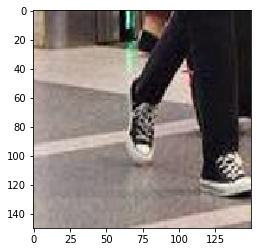

In [114]:
image = Image.open('./img/casualShoes/0.jpg')

resize_image = image.resize((150,150)).convert('RGB')

import matplotlib.pyplot as pp


pp.imshow(resize_image)



In [76]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 15s 0us/step
